In [1]:
import os
os.chdir(f'../')

In [2]:
BASE_PATH = './pretrained'
MOBILE_FACE_NET_WEIGHTS_PATH = BASE_PATH + '/mobilefacenet_model_best.pth.tar'
GENERATOR_WEIGHTS_PATH = BASE_PATH + '/550000.pt'
E_ID_LOSS_PATH = BASE_PATH + '/model_ir_se50.pth'
IMAGE_DATA_DIR = BASE_PATH + '/fake/small_image/'
W_DATA_DIR = BASE_PATH + '/fake/small_w/'
MODELS_DIR = BASE_PATH + '/Models/'

In [3]:
import torch
from Models.CartoonGan.model import Transformer

weights = torch.load('./pretrained/Hayao_net_G_float.pth', map_location=torch.device('cuda'))
model = Transformer()
model.load_state_dict(weights)
model.to('cuda:0')
model.eval()

Transformer(
  (refpad01_1): ReflectionPad2d((3, 3, 3, 3))
  (conv01_1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
  (in01_1): InstanceNormalization()
  (conv02_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv02_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (in02_1): InstanceNormalization()
  (conv03_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv03_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (in03_1): InstanceNormalization()
  (refpad04_1): ReflectionPad2d((1, 1, 1, 1))
  (conv04_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in04_1): InstanceNormalization()
  (refpad04_2): ReflectionPad2d((1, 1, 1, 1))
  (conv04_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in04_2): InstanceNormalization()
  (refpad05_1): ReflectionPad2d((1, 1, 1, 1))
  (conv05_1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (in05_1): InstanceNormalization()

In [4]:
import torchvision.transforms as T
from PIL import Image
import numpy as np

transformer = T.Compose([
    T.CenterCrop(256),
    T.ToTensor()
])

In [25]:
img = Image.open('./Experiments/Frontalization/R&R/360_frontal.png').convert('RGB')
transformed_img = np.asarray(img)
transformed_img = transformed_img[:, :, [2, 1, 0]]
# transformed_img = transformer(transformed_img)
transformed_img = T.Resize(256, antialias=True)(T.ToTensor()(transformed_img)).unsqueeze(0)
transformed_img = -1 + 2 * transformed_img
transformed_img = transformed_img.to('cuda:0')

In [26]:
generated_img = model(transformed_img)
generated_img = generated_img[0]
generated_img = generated_img[[2, 1, 0], :, :]
generated_img = generated_img.data.cpu().float() * 0.5 + 0.5

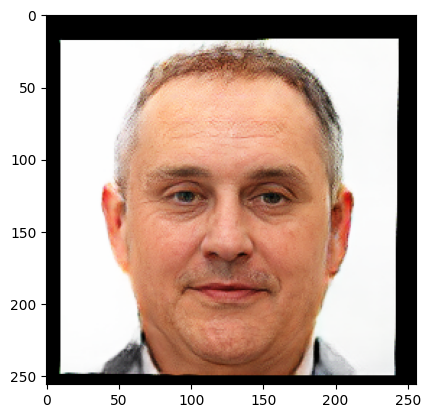

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img)

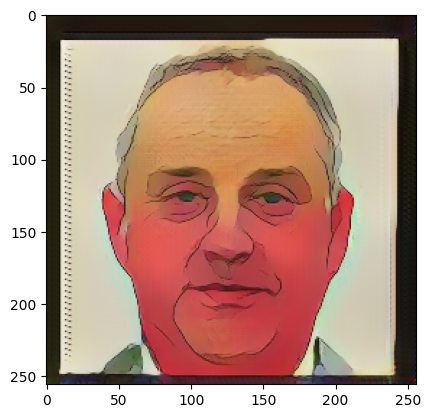

In [28]:
output_img = np.transpose(generated_img, (1, 2, 0))
output_img = Image.fromarray((output_img.numpy() * 255).astype(np.uint8))
output_img.save('./Experiments/Frontalization/R&R/360_cartoon.png')
plt.imshow(np.transpose(generated_img, (1, 2, 0)))